### EDA - auto+mpg - Parte II

In [1]:
# Exemplo EDA sobre o dataset de datos de coches
# https://www.datafied.world/eda-on-mpg-data-using-seaborn-192

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 'mpg' é un coñecido dataset con datos de automóbiles que se encontra como exemplo na libraría 'seaborn'
# Tamén dispoñible no UCI: Machine Learning Repository
# https://archive.ics.uci.edu/ml/datasets/auto+mpg

# O repositorio proporciona a seguinte información:
# Attribute Information:

# 1. mpg: continuous
# 2. cylinders: multi-valued discrete
# 3. displacement: continuous
# 4. horsepower: continuous
# 5. weight: continuous
# 6. acceleration: continuous
# 7. model year: multi-valued discrete
# 8. origin: multi-valued discrete
# 9. car name: string (unique for each instance)

In [4]:
df = sns.load_dataset('mpg')

In [5]:
# Fases do EDA
# 1. Preprocesar os datos
# 2. EDA sobre atributos categóricos: analizar distribución e relacións con outros categóricos
# 3. EDA sobre atributos numéricos: analizar distribució e relacións con outros numéricos
# 4. Análise da relación entre categóricos e numéricos

In [6]:
# Nesta parte II centrámonos na análise dos atributos numéricos

In [7]:
# Cargamos o dataset gardado despois da parte do EDA de variables categóricas
df = pd.read_csv("mpg_cated.csv")
df.head()

,origin,cylinders,model_year,mpg_level,car_company,mpg,displacement,horsepower,weight,acceleration
0,usa,8,70,medium,chevrolet,18.0,307.0,130.0,3504,12.0
1,usa,8,70,low,buick,15.0,350.0,165.0,3693,11.5
2,usa,8,70,medium,plymouth,18.0,318.0,150.0,3436,11.0
3,usa,8,70,low,amc,16.0,304.0,150.0,3433,12.0
4,usa,8,70,medium,ford,17.0,302.0,140.0,3449,10.5


In [8]:
# Na primeira parte definimos cales eran as variables numéricas na variable 'nums'
nums = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
print(f'numerical variables:  {nums}')

numerical variables:  ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']


In [9]:
# As variables están ordenadas no datafram, coas variables numéricas na parte dereita
# Podo crear un novo dataframe unicamente para os datos das variables numéricas
df_num = df.loc[:, 'mpg':]

In [10]:
df_num.describe()

,mpg,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,2977.584184,15.541327
std,7.805007,104.644004,38.491160,849.402560,2.758864
min,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,455.000000,230.000000,5140.000000,24.800000


#### Análise de Distribución dos atributos numéricos

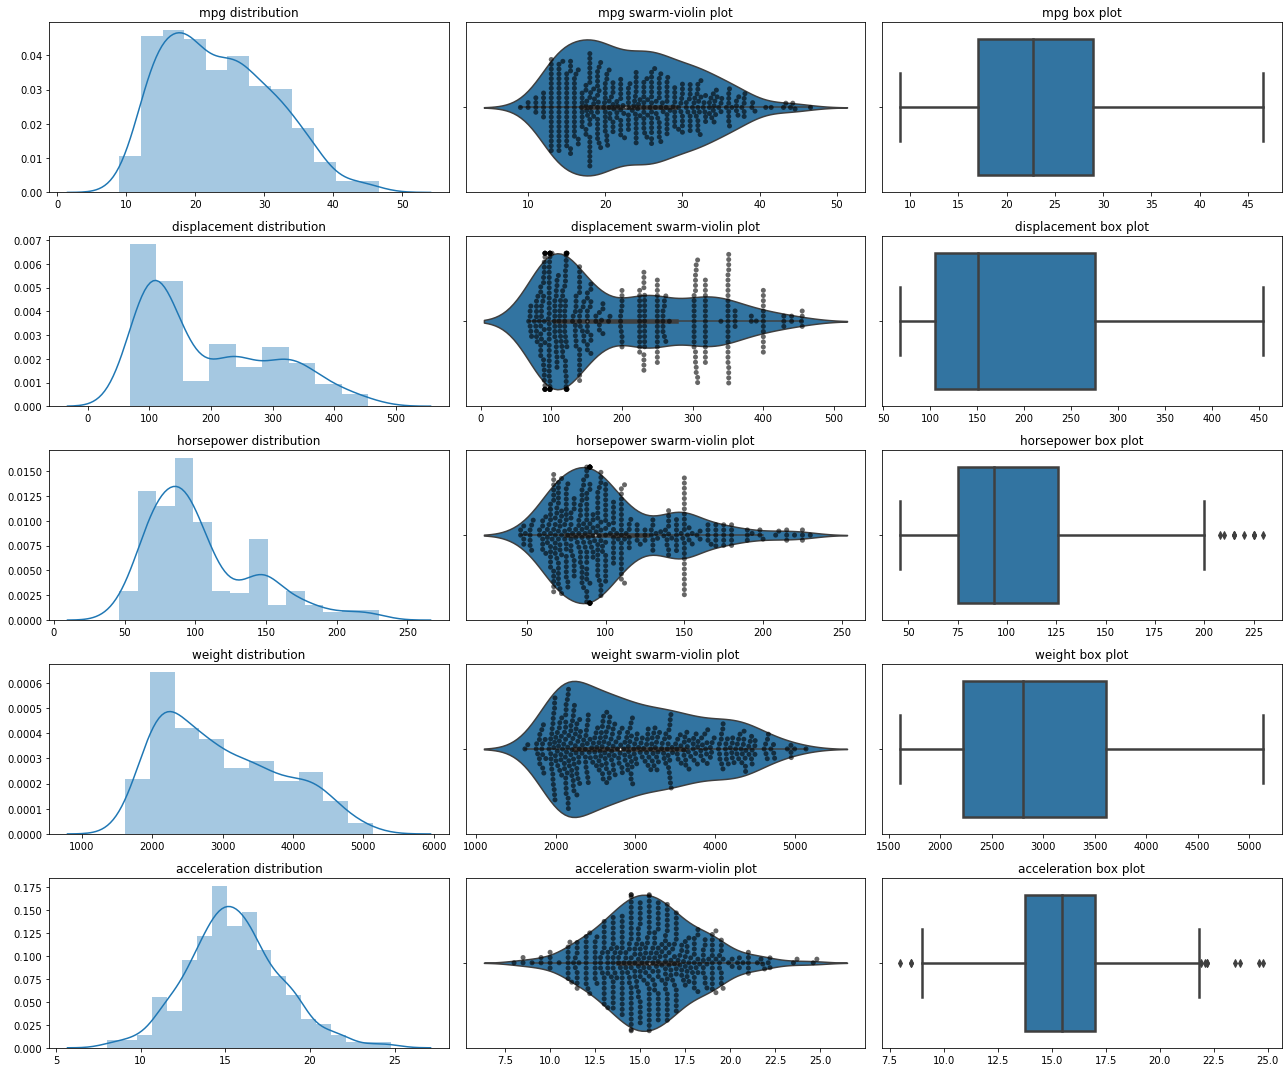

In [11]:
rows = len(nums)
cols = 3

fig = plt.figure(1, (18, rows*3))

i = 0
for col in nums:
    
    i += 1
    ax1 = plt.subplot(rows, cols,i)
#     ax1.hist(df[col], alpha=0.6)
    sns.distplot(df_num[col])
    ax1.set_xlabel(None)
    ax1.set_title(f'{col} distribution')
    plt.tight_layout()

    i += 1
    ax2 = plt.subplot(rows, cols,i)
    sns.violinplot(df_num[col])
    sns.swarmplot(df_num[col], alpha=0.6, color='k')
    ax2.set_xlabel(None)
    ax2.set_title(f'{col} swarm-violin plot')
    plt.tight_layout()

    i += 1
    ax3 = plt.subplot(rows, cols,i)
    sns.boxplot(df_num[col], orient='h', linewidth=2.5)
    ax3.set_xlabel(None)
    ax3.set_title(f'{col} box plot')
    plt.tight_layout()



**Insights**
- 'acceleration' é a única distribución que se axusta á 'Normal' (ou distribución gaussiana) (con algúns outliers)
- 'mpg' e 'weight' teñen distribucións que semellan normais, mais sesgadas á dereita, é dicir, concentran maior número de ocorrencias na parte esquerda da "campana"
- 'displacement' e 'horsepower' semellan lonxe da  normal

##### Análise dos outliers

In [12]:
# Utilizando a formula de tukey

def tukey_outliers(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    
    iqr = q3-q1
    
    min_range = q1 - iqr*1.5
    max_range = q3 + iqr*1.5
    
    outliers = x[(x<min_range) | (x>max_range)]
    return outliers

for col in nums:
    outliers = tukey_outliers(df_num[col])
    if len(outliers):
        print(f"* {col} has these tukey outliers,\n{outliers}\n")
    else:
        print(f"* {col} doesn't have any tukey outliers.\n")

* mpg doesn't have any tukey outliers.

* displacement doesn't have any tukey outliers.

* horsepower has these tukey outliers,
6      220.0
7      215.0
8      225.0
13     225.0
25     215.0
27     210.0
66     208.0
93     215.0
94     225.0
115    230.0
Name: horsepower, dtype: float64

* weight doesn't have any tukey outliers.

* acceleration has these tukey outliers,
7       8.5
9       8.5
11      8.0
58     23.5
193    22.2
194    22.1
207    21.9
297    24.8
298    22.2
324    23.7
388    24.6
Name: acceleration, dtype: float64



In [13]:
# Mostra os outliers na columna de 'acceleration'

df.iloc[list(tukey_outliers(df_num.acceleration).index)]

,origin,cylinders,model_year,mpg_level,car_company,mpg,displacement,horsepower,weight,acceleration
7,usa,8,70,low,plymouth,14.0,440.0,215.0,4312,8.5
9,usa,8,70,low,amc,15.0,390.0,190.0,3850,8.5
11,usa,8,70,low,plymouth,14.0,340.0,160.0,3609,8.0
58,europe,4,72,medium,volkswagen,23.0,97.0,54.0,2254,23.5
193,usa,4,76,medium,chevrolet,29.0,85.0,52.0,2035,22.2
194,usa,4,76,medium,chevrolet,24.5,98.0,60.0,2164,22.1
207,europe,4,76,medium,peugeot,19.0,120.0,88.0,3270,21.9
297,europe,4,79,medium,peugeot,27.2,141.0,71.0,3190,24.8
298,usa,8,79,medium,oldsmobile,23.9,260.0,90.0,3420,22.2
324,europe,4,80,high,vw,43.4,90.0,48.0,2335,23.7


In [14]:
# Mostra os outliers na columna de 'horsepower'

df.iloc[list(tukey_outliers(df_num.horsepower).index)]

,origin,cylinders,model_year,mpg_level,car_company,mpg,displacement,horsepower,weight,acceleration
6,usa,8,70,low,chevrolet,14.0,454.0,220.0,4354,9.0
7,usa,8,70,low,plymouth,14.0,440.0,215.0,4312,8.5
8,usa,8,70,low,pontiac,14.0,455.0,225.0,4425,10.0
13,usa,8,70,low,buick,14.0,455.0,225.0,3086,10.0
25,usa,8,70,low,ford,10.0,360.0,215.0,4615,14.0
27,usa,8,70,low,dodge,11.0,318.0,210.0,4382,13.5
66,usa,8,72,low,mercury,11.0,429.0,208.0,4633,11.0
93,usa,8,73,low,chrysler,13.0,440.0,215.0,4735,11.0
94,usa,8,73,low,buick,12.0,455.0,225.0,4951,11.0
115,usa,8,73,low,pontiac,16.0,400.0,230.0,4278,9.5


**Insights**
- Os outliers en 'acceleration' parecen ser aleatorios, non se deteta ningún patrón.
- Os outliers en 'horsepower' non parecen random, teñen cousas en común:
-- orixe: todos son de usa
-- cylinders: todos teñen 8 cilindros
-- mpg_level: todos teñen un low mpg_leve -> moito consumo
-- weight: practicamente todos superan os 4000 
-- model_year: trátase de modelos dos mais vellos do dataset (inicios dos 70')

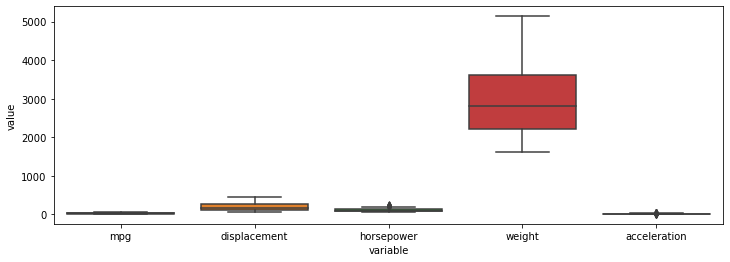

In [15]:
# see data is not scaled properly, we need to scale it for modelling but works fine for analysis.
fig = plt.figure(1, (12, 4))
ax = plt.subplot(1,1,1)
sns.boxplot(x="variable", y="value", data=pd.melt(df_num))
plt.xlabel(None)
plt.ylabel(None)
plt.show()

#### Relación entre os diferentes atributos numéricos

In [20]:
# Pairplot, de Seaborn, encárgase de crear unha matriz de gráficas cruzando as variables que indiquemos
# a través de scatterplots.
# Pairplot utiliza a diagonal para pintar unha gráfica de distribución de cada unha das variables
# Fíxate na simetría dos gráficos da esquina inferior esquerda e superior directa, pois son o resultado
# de mudar os eixos X e Y

# Info sobre pairplots
# https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

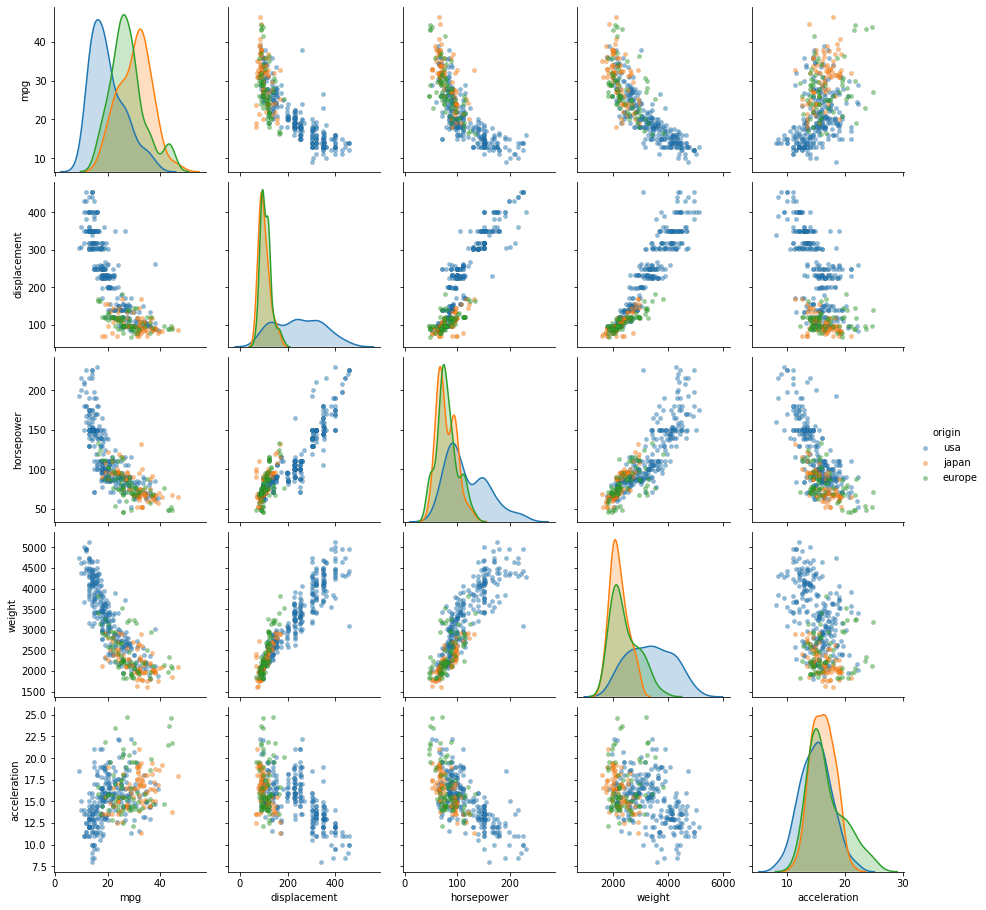

In [18]:
sns.pairplot(data=df, vars=nums, diag_kind='kde', hue='origin',
            plot_kws=dict(s=20, edgecolor="k", linewidth=0.1, alpha=0.5), diag_kws=dict(shade=True))
plt.show()

In [22]:
# Visualizamos unha matriz de correlación entre as diferentes variables numéricas, o que nos da unha
# rápida impresión das correlacións máis fortes (cores escuros)

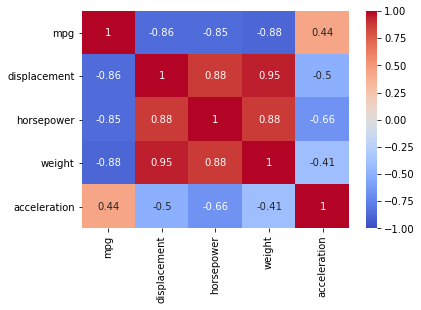

In [23]:
sns.heatmap(df_num.corr(method='spearman'), annot = True, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm')
plt.show()

**Insights**
- A medida que aumenta o mpg (descende o consumo) o 'displacement', 'horsepower' e 'weight' diminúen, pero acceleración aumenta
- O incremento no 'horsepower' aumenta 'diplacement' e 'weight' pero decrementa 'acceleration'
- 'Weight' aumenta con 'displacement' pero decrementa 'acceleration'
- A medida que aumenta 'acceleration' descende 'displacement'

Todos as variables correlacionan, en maior ou menor medida, coas demais

In [24]:
# Algúns gráficos permiten relacionar variables numéricas engadindos diferentes categorías de xeito simultáneo
# Pode utilizarse a cor, o tamaño, ou debuxar varias gráficas atendendo aos valores da categoría

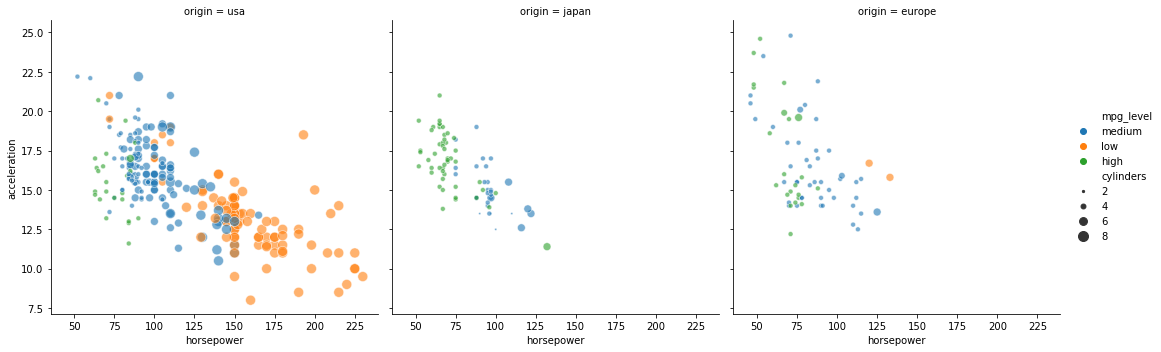

In [25]:
'''In this plot we analyze the relationship of horsepower & acceleration
bifurcated by origin, mpg_level & cylinders in a single plot.'''

sns.relplot(x='horsepower', y='acceleration', hue='mpg_level', #style='mpg_level',
            size='cylinders', col='origin', data=df, kind='scatter', sizes=(5, 100), alpha=0.6)
plt.show()

**Insights**
- En todas as rexións hai unha correlación negativa entre horsepower e acceleration
- Vehículos con low "mpg_level" teñen maior horsepower e menor acceleration
- Vehículos con máis cilindros teñen maior horsepower e menos acceleration

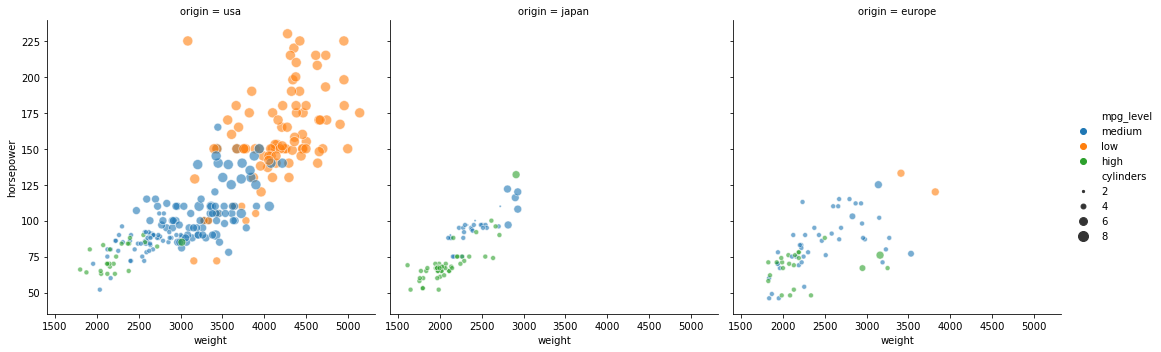

In [26]:
'''In this plot we analyze the relationship of weight & horsepower
bifurcated by origin, mpg_level & cylinders in a single plot.'''

sns.relplot(x='weight', y='horsepower', hue='mpg_level', #style='mpg_level',
            size='cylinders', col='origin', data=df, kind='scatter', sizes=(5, 100), alpha=0.6)
plt.show()

**Insights**
- En todas as rexións hai unha correlación positiva entre peso e potencia (weight e horsepower)
- Vehículos con baixo mpg teñen mais peso e potencia (weight e horsepower)
- Vehículos con máis cilindros teñen mais peso e potencia (weight e horsepower)